## The Pendulum, Numerically

The equation of motion for the simple pendulum is 
$$
\ddot{\phi} = -\frac{g}{\ell} \sin \phi.
$$
This ODE is nonlinear and must be solved numerically.  Here's how we can do that using a simple scheme known as Euler's method.

First, turn your second order ODE into two first order ODEs by defining a new variable, $\omega$, such that
$$
\frac{d\phi}{dt} = \omega.
$$
Note that $\omega$ is the angular velocity of the pendulum.
Then the equation of motion reads
$$
\frac{d\omega}{dt} = -\frac{g}{\ell} \sin\phi.
$$
This gives us two coupled first order ODEs.

To solve them numerically, we approximate the deriviatives as finite differences, so that, e.g., $dt = \Delta t$ and $d\omega = \Delta \omega$.  If we have our initial conditions -- $\phi(0)$ and $\omega(0)$ -- we can build up our solution successively using the algorithm
$$
\phi_\text{n+1} = \phi_\text{n} + \Delta \phi  = \phi_\text{n} + \omega_n \Delta t
$$
$$
\omega_\text{n+1} = \omega_\text{n} + \Delta \omega = \omega_\text{n} + \left(  -\frac{g}{\ell} \sin\phi_\text{n} \right) \Delta t.
$$

Here's an implementation in Python.


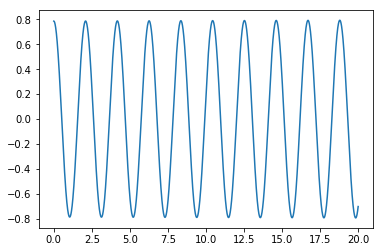

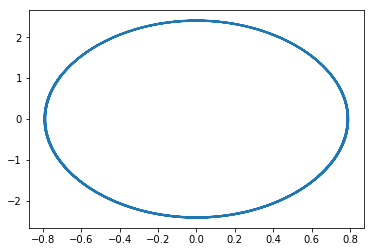

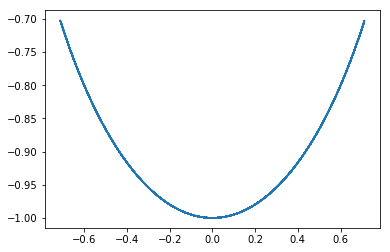

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

g = 9.8 # m/s^2
l = 1.0 # m

t_start = 0.0 # times are in seconds
t_end = 20.0
dt = 0.0001

t = np.arange(t_start, t_end, dt)
N = len(t)
theta = np.zeros(N)
omega = np.zeros(N)

# our initial conditions -- let the pendulum go from rest at 45 degrees
theta[0] = np.pi/4.0
omega[0] = 0.0

for i in range(0, N-1):
    theta[i+1] = theta[i] + omega[i] * dt
    omega[i+1] = omega[i] + (-g/l * np.sin(theta[i])) * dt

# first plot theta(t)    
plt.plot(t, theta)
plt.show()

# then do the phase diagram, theta vs omega
plt.plot(theta, omega)
plt.show()

# and how about y(x)
x = l * np.sin(theta)
y = -l * np.cos(theta)
plt.plot(x, y)
plt.show()

Note that the timestep is very small; try it with a larger one and see what happens.  You might want to look up a Runge-Kutta method and try that one instead of Euler.